# Numpy Session 2

## Numpy array vs Python lists

In [3]:
# Speed
# List
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time()-start)

3.758369207382202


In [4]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start =time.time()
c = a+b
print(time.time()-start)

0.2804079055786133


In [15]:
1.3972697257995605/0.15543198585510254

8.989589357123245

In [ ]:
# memory
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a) # in bytes

89095160

In [19]:
a = np.arange(10000000,dtype=np.int8) # can usedtype -> 32,16,8 bytes
sys.getsizeof(a)

10000112

In [4]:
#convenience

## Advanced Indexing

In [30]:
# Normal Indexing and slicing
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [24]:
a[1,2]

np.int64(5)

In [25]:
a[1:3,1:3]

array([[4, 5],
       [7, 8]])

In [28]:
# Fancy Indexing -> If pattern not forms like row 1,2,4

a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [29]:
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [31]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [34]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [38]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [55]:
# Boolean Indexing
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[ 9, 75, 72, 91],
       [ 3, 81, 25, 25],
       [ 2, 91, 65, 29],
       [ 1, 86, 51, 96],
       [91, 88, 94,  4],
       [16, 67, 43, 77]], dtype=int32)

In [56]:
# find all numbers greater than 50
a > 50

array([[False,  True,  True,  True],
       [False,  True, False, False],
       [False,  True,  True, False],
       [False,  True,  True,  True],
       [ True,  True,  True, False],
       [False,  True, False,  True]])

In [57]:
a[a>50]

array([75, 72, 91, 81, 91, 65, 86, 51, 96, 91, 88, 94, 67, 77],
      dtype=int32)

In [59]:
# find out even numbers
a[a % 2 ==0]

array([72,  2, 86, 96, 88, 94,  4, 16], dtype=int32)

In [78]:
# find all numbers greater than 50 and are even
a[(a>50) & (a%2==0)] #used bitwise & because of bool values

array([72, 86, 96, 88, 94], dtype=int32)

In [81]:
# find all numbers not divisible by 7
# a[a%7 != 0]
a[~(a%7 == 0)]

array([ 9, 75, 72,  3, 81, 25, 25,  2, 65, 29,  1, 86, 51, 96, 88, 94,  4,
       16, 67, 43], dtype=int32)

## Broadcasting
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetics operations.

The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In [96]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


In [97]:
print(a+b)

[[ 6  8 10]
 [12 14 16]]


In [98]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print(b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]


In [99]:
a+b

array([[0, 2, 4],
       [3, 5, 7]])

## Broadcasting Rules

1. Make the two arrays have the same number of dimensions.  
   - If the number of dimensions of the two arrays is different, add new dimensions with size `1` to the **front** of the array with the smaller number of dimensions.

2. Make each dimension of the two arrays the same size.  
   - If the sizes of each dimension of the two arrays do not match, dimensions with size `1` are stretched to match the other array.  
   - If there is a dimension whose size is not `1` in either of the two arrays, broadcasting is not possible and an error is raised.

<p align="left">
  <img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" alt="Broadcasting rules" width="500"/>
</p>



In [105]:

# More examples
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a,b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] [0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [107]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
print(a,b)
print(a+b)

[[0 1 2]] [[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [110]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a,b)
print(a+b)

[[0 1 2]] [[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [116]:
a = np.array([1])
#shape - > (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a,b)
print(a+b)

[1] [[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [124]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a,"\n\n",b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

## Working with mathematical formulas

In [5]:
a = np.arange(5) # sin/cos/tans...
np.sum(a)

np.int64(10)

In [6]:
# sigmoid
def sigmoid(array):
    return 1/(1 + np.exp(-(array)))
a = np.arange(30)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [7]:
# mean squared error
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [8]:
predicted

array([33, 18, 43, 31,  7, 29,  4, 22, 14,  2, 39, 29,  4, 20, 31,  8, 39,
       33, 23, 40, 36, 46,  9, 19, 21], dtype=int32)

In [9]:
actual

array([26, 16, 21, 34, 26,  5, 32, 10, 10, 27, 48, 27, 30,  2, 31, 48, 23,
        1, 20, 24, 17,  8,  9, 18, 35], dtype=int32)

In [10]:
def mse(actual, predicted):
    return np.mean((actual - predicted)**2)
mse(actual,predicted)

np.float64(371.36)

In [147]:
np.mean((actual - predicted)**2)

np.float64(411.8)

In [11]:
# binary cross entropy fn
BCE = -np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))



C:\Users\daans\AppData\Local\Temp\ipykernel_8936\2275205512.py:2: RuntimeWarning: invalid value encountered in log
  BCE = -np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))


## Working with missing values

In [18]:
# missign values in numpy -> np.nan
a = np.array([1,2,3,4,np.nan, 6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [19]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [20]:
a[np.isnan(a)]

array([nan])

In [21]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

## Plotting Graphs

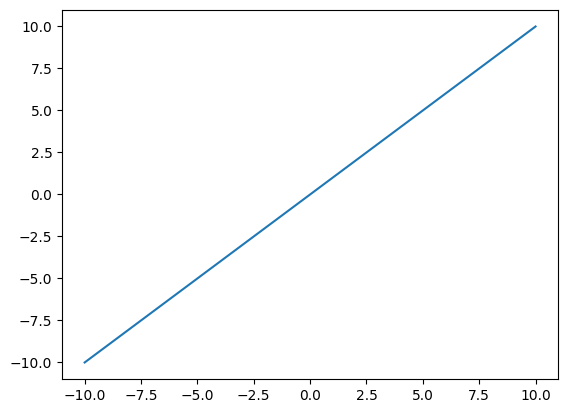

In [33]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt
x = np.linspace(-10, 10,100)
y = x

plt.plot(x,y)

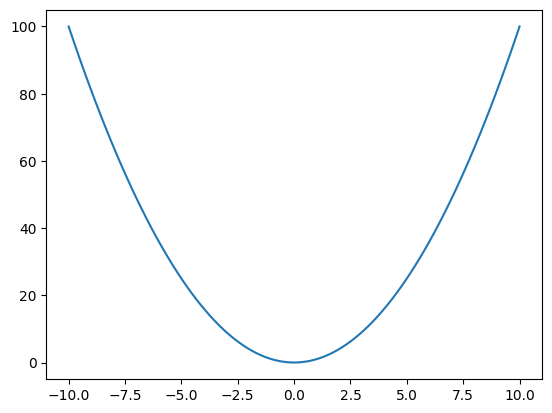

In [34]:
# y = x^2
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x,y)

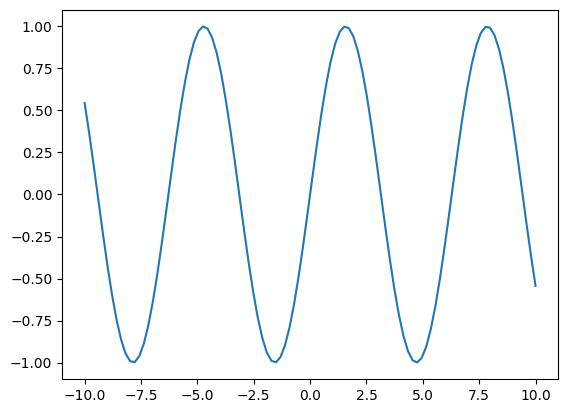

In [36]:
# y = sin(x)
x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x,y)


C:\Users\daans\AppData\Local\Temp\ipykernel_8936\3871870499.py:3: RuntimeWarning: invalid value encountered in log
  y = x* np.log(x)


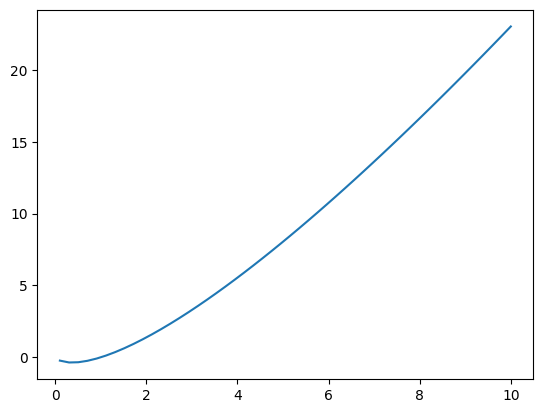

In [37]:
# y = xlog(x)
x = np.linspace(-10, 10,100)
y = x* np.log(x)

plt.plot(x,y)

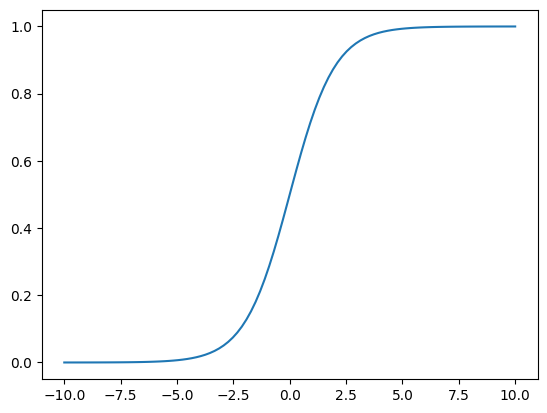

In [39]:
# sigmoid graph
x = np.linspace(-10, 10, 100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)